<a href="https://colab.research.google.com/github/farhafahmi/Text-Sentiment-Analysis/blob/main/TASK3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(30,1)})

def visualise_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

In [ ]:
sentence = "i really like you but you can be so dumb some times"

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sid.polarity_scores(sentence)

{'neg': 0.35, 'neu': 0.537, 'pos': 0.113, 'compound': -0.7154}

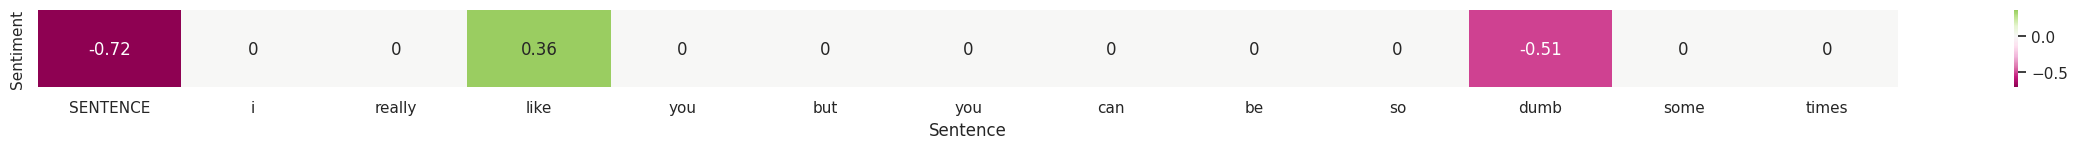

In [ ]:
visualise_sentiments({
    "Sentence":["SENTENCE"] + sentence.split(),
    "Sentiment":[sid.polarity_scores(sentence)["compound"]] + [sid.polarity_scores(word)["compound"] for word in sentence.split()]
})

In [ ]:
from textblob import TextBlob

In [ ]:
TextBlob(sentence).sentiment

Sentiment(polarity=-0.0875, subjectivity=0.35)

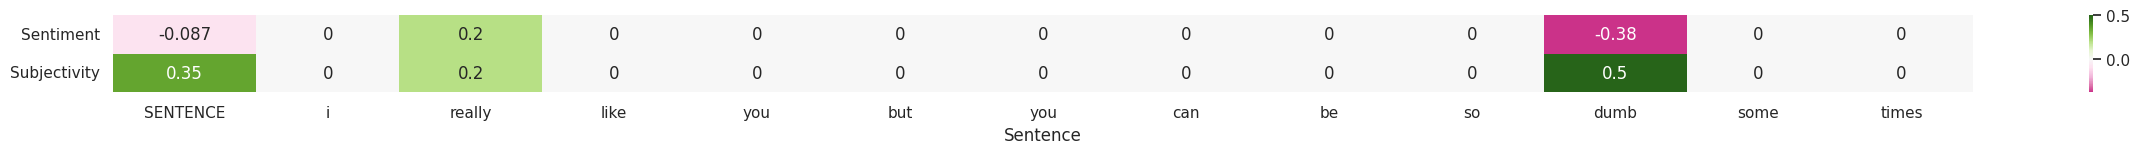

In [ ]:
visualise_sentiments({
      "Sentence":["SENTENCE"] + sentence.split(),
      "Sentiment":[TextBlob(sentence).polarity] + [TextBlob(word).polarity for word in sentence.split()],
      "Subjectivity":[TextBlob(sentence).subjectivity] + [TextBlob(word).subjectivity for word in sentence.split()],
})

In [ ]:
!pip3 install flair
import flair
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 46.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

100%|██████████| 253M/253M [04:45<00:00, 931kB/s] 

2025-07-19 15:13:31,768 copying /tmp/tmpwqxm0zc9 to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2025-07-19 15:13:32,129 removing temp file /tmp/tmpwqxm0zc9


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
s = flair.data.Sentence(sentence)
flair_sentiment.predict(s)
total_sentiment = s.labels
total_sentiment

['Sentence[12]: "i really like you but you can be so dumb some times"'/'POSITIVE' (0.9739)]

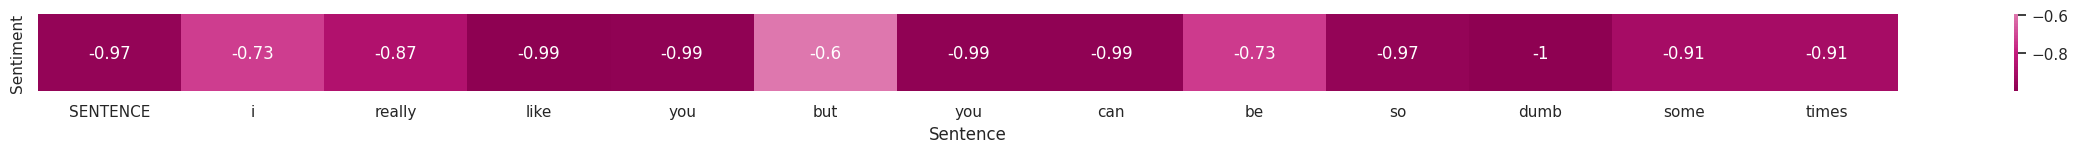

In [ ]:
tokens = [token.text for token in s.tokens]
ss = [flair.data.Sentence(s) for s in tokens]
[flair_sentiment.predict(s) for s in ss]
sentiments = [s.labels[0].score * (-1,1)[str(s.labels[0]).split()[0].startswith("POS")] for s in ss]

visualise_sentiments({
      "Sentence":["SENTENCE"] + tokens,
      "Sentiment":[total_sentiment[0].score *(-1,1)[str(total_sentiment[0]).split()[0].startswith("POS")]] + sentiments,
})

In [ ]:
!pip install flair


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


2025-07-29 15:26:05,382 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmpctjgvth_


100%|██████████| 253M/253M [00:14<00:00, 17.7MB/s]

2025-07-29 15:26:20,823 copying /tmp/tmpctjgvth_ to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2025-07-29 15:26:21,369 removing temp file /tmp/tmpctjgvth_


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

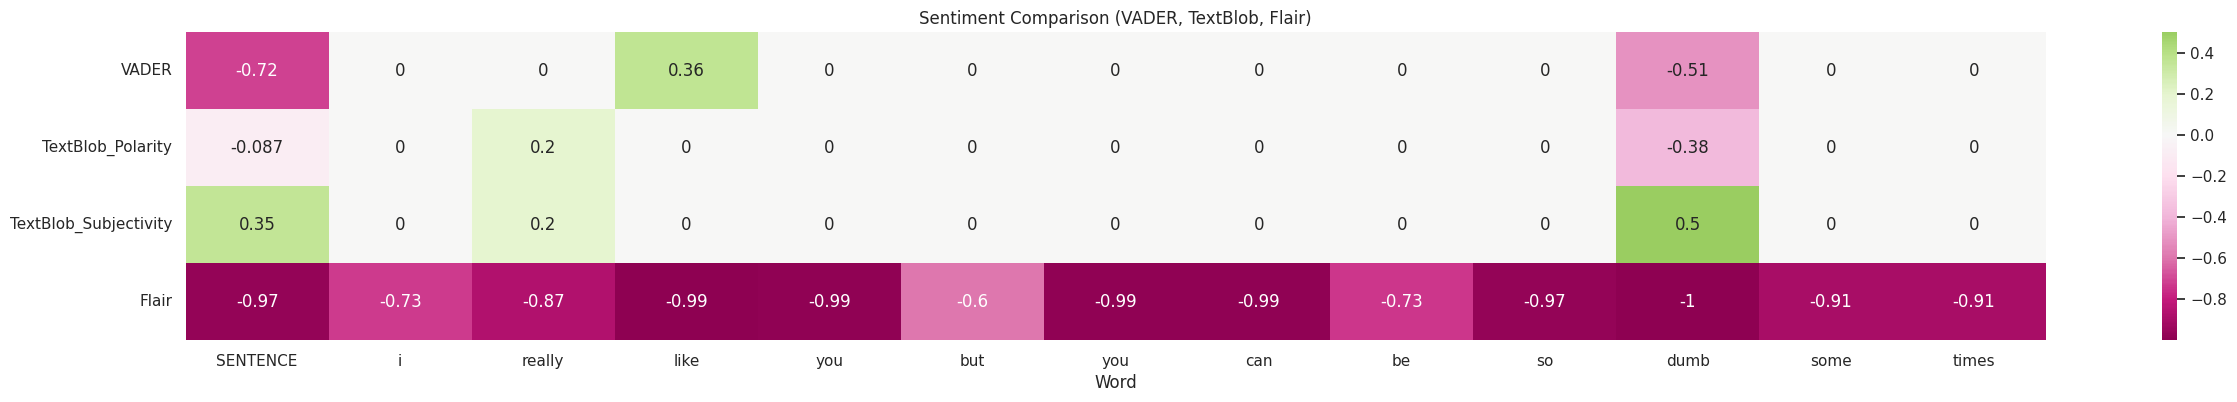

In [ ]:
# ✅ Import dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import flair

# ✅ Input sentence
sentence = "i really like you but you can be so dumb some times"

# ✅ Initialise VADER
sid = SentimentIntensityAnalyzer()

# ✅ Initialise Flair
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

# ✅ Sentence tokens
tokens = sentence.split()

# ✅ VADER
vader_sentiments = [sid.polarity_scores(sentence)["compound"]] + [
    sid.polarity_scores(word)["compound"] for word in tokens
]

# ✅ TextBlob
textblob_polarity = [TextBlob(sentence).polarity] + [TextBlob(word).polarity for word in tokens]
textblob_subjectivity = [TextBlob(sentence).subjectivity] + [TextBlob(word).subjectivity for word in tokens]

# ✅ Flair
s = flair.data.Sentence(sentence)
flair_sentiment.predict(s)
total_sentiment = s.labels
ss = [flair.data.Sentence(w) for w in tokens]
[flair_sentiment.predict(x) for x in ss]
flair_sentiments = [
    total_sentiment[0].score * (-1, 1)[str(total_sentiment[0]).split()[0].startswith("POS")]
] + [
    x.labels[0].score * (-1, 1)[str(x.labels[0]).split()[0].startswith("POS")] for x in ss
]

# ✅ Combine all
df = pd.DataFrame({
    "Word": ["SENTENCE"] + tokens,
    "VADER": vader_sentiments,
    "TextBlob_Polarity": textblob_polarity,
    "TextBlob_Subjectivity": textblob_subjectivity,
    "Flair": flair_sentiments
}).set_index("Word").T

# ✅ Visualise
sns.set(rc={'figure.figsize':(30, 4)})
sns.heatmap(df, annot=True, center=0, cmap="PiYG")
plt.title("Sentiment Comparison (VADER, TextBlob, Flair)")
plt.show()


In [ ]:
df.T.to_csv("sentiment_results.csv")
print("Saved to sentiment_results.csv")


Saved to sentiment_results.csv


In [ ]:
def compare_sentiments(sentence):
    tokens = sentence.split()

    vader = [sid.polarity_scores(sentence)["compound"]] + [sid.polarity_scores(w)["compound"] for w in tokens]
    tb_pol = [TextBlob(sentence).polarity] + [TextBlob(w).polarity for w in tokens]
    tb_sub = [TextBlob(sentence).subjectivity] + [TextBlob(w).subjectivity for w in tokens]

    s = flair.data.Sentence(sentence)
    flair_sentiment.predict(s)
    total = s.labels
    ss = [flair.data.Sentence(w) for w in tokens]
    [flair_sentiment.predict(x) for x in ss]
    flair_s = [total[0].score * (-1, 1)[str(total[0]).split()[0].startswith("POS")]] + [
        x.labels[0].score * (-1, 1)[str(x.labels[0]).split()[0].startswith("POS")] for x in ss
    ]

    df = pd.DataFrame({
        "Word": ["SENTENCE"] + tokens,
        "VADER": vader,
        "TextBlob_Polarity": tb_pol,
        "TextBlob_Subjectivity": tb_sub,
        "Flair": flair_s
    }).set_index("Word").T

    sns.set(rc={'figure.figsize':(30, 4)})
    sns.heatmap(df, annot=True, center=0, cmap="PiYG")
    plt.title("Sentiment Comparison")
    plt.show()

    return df.T


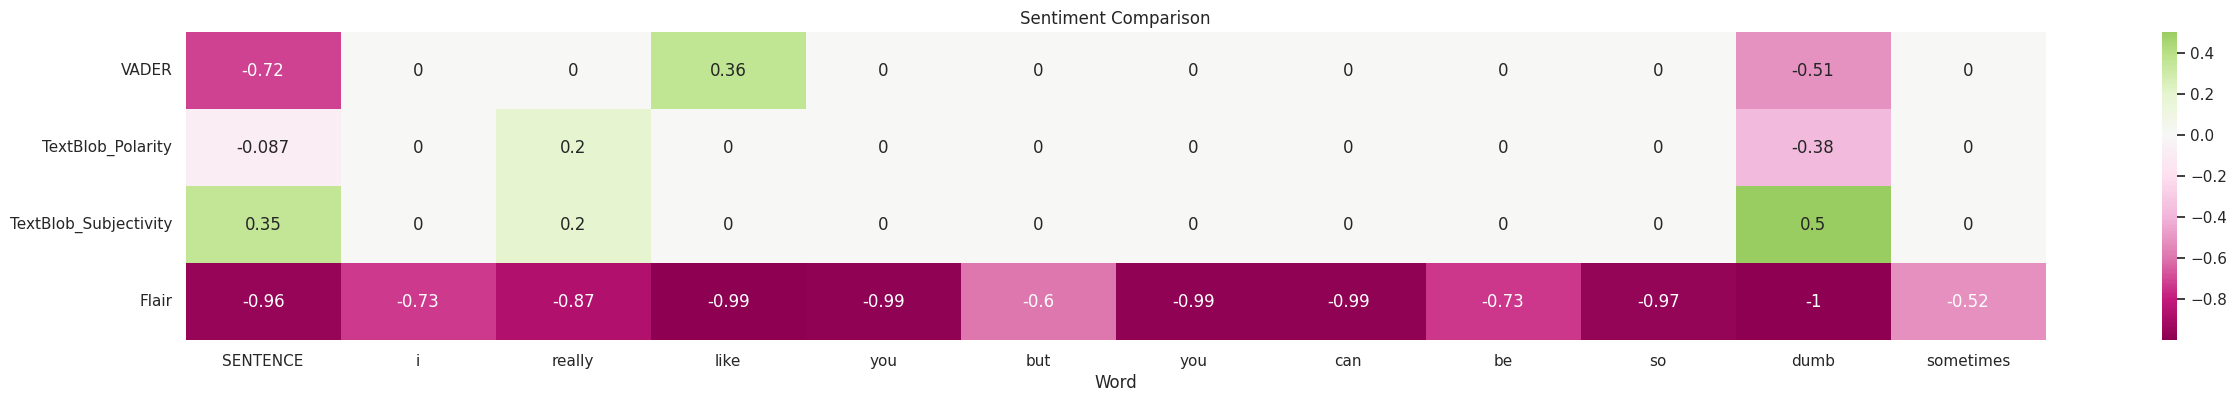

,VADER,TextBlob_Polarity,TextBlob_Subjectivity,Flair
Word,,,,
SENTENCE,-0.7154,-0.0875,0.35,-0.960219
i,0.0000,0.0000,0.00,-0.726712
really,0.0000,0.2000,0.20,-0.868960
like,0.3612,0.0000,0.00,-0.993222
you,0.0000,0.0000,0.00,-0.985526
but,0.0000,0.0000,0.00,-0.595791
you,0.0000,0.0000,0.00,-0.985526
can,0.0000,0.0000,0.00,-0.987661
be,0.0000,0.0000,0.00,-0.732826


In [ ]:
compare_sentiments("i really like you but you can be so dumb sometimes")
